# Modeling with linear regression

## Overview
- Simple linear regression (26 pages)
- Hierarchical linear regression (5 pages)
- Polynomial regression (7 pages)
- Multiple linear regression (16 pages)
- Variable variance (4 pages)

## Simple linear regression

The prior over the coefficients $\beta$ and error variance $\sigma^2$ decomposes as
$$
p(\beta, \sigma^2) = p(\beta|\sigma^2) p(\sigma^2)
$$
in which the first term is conditionally normal, and the second is inverse gamma (see Wikipedia, Bayesian linear regression)

Useful post on how to choose priors for variance: https://stats.stackexchange.com/questions/237847/what-are-the-properties-of-a-half-cauchy-distribution

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as az

In [9]:
plt.style.use('seaborn-darkgrid')

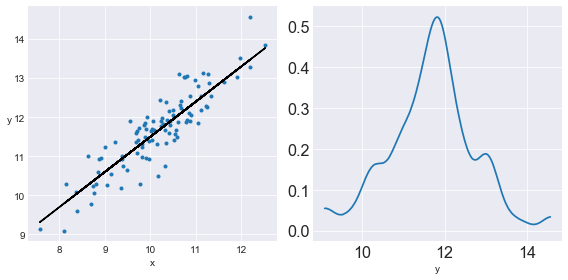

In [13]:
np.random.seed(1)
N = 100
α_real = 2.5
β_real = 0.9
ϵ_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = α_real + β_real * x
y = y_real + ϵ_real

_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

In [17]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_g = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β, α]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:17<00:00, 348.46draws/s]


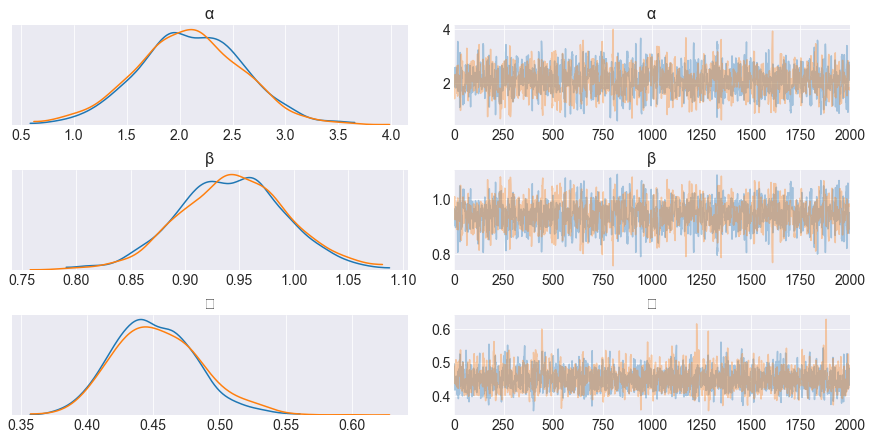

In [19]:
az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ']);

In [28]:
y_pred = pm.sample_posterior_predictive(trace_g, 1, model_g)

100%|██████████| 1/1 [00:00<00:00, 283.97it/s]


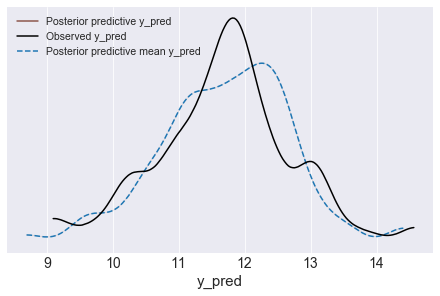

In [29]:
data_ppc = az.from_pymc3(trace_g, posterior_predictive=y_pred)
az.plot_ppc(data_ppc);

In practice, most people will agree that polynomials of order higher than 2 or 3 are not generally very useful models and alternatives are preferred, such as Gaussian processes, which is the main subject of Chapter 7 , Gaussian Processes.